In [ ]:
import pandas as pd
n_mapping=pd.read_csv("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%206/neighborhood_mapping_cleaned.csv")

In [ ]:
pd.DataFrame(apartments["location"].unique.()).to_csv("example.CSV")

In [ ]:
apartments.merge(n_mapping,"left",left_one="location",right_one="given")

In [ ]:
apartments.groupby("location_clean").count().sort_values("title",ascending=False)

In [ ]:
import urllib
from bs4 import BeautifulSoup

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0"
}
url = "http://tobypenk.com/scrape-example/"

request = urllib.request.Request(url,None,HEADERS)

file_req = urllib.request.urlopen(request)

file_data = file_req.read()

soup= BeautifulSoup(file_data)
soup

<!DOCTYPE html>
<html>
<head>
<style>
			.recipe-stub {
				border-radius: 5px;
				border: 1px solid grey;
				width: 660px;
				padding: 4px;
				margin: 10px;
				display: flex;
				justify-content: space-between;
			}
		</style>
</head>
<body>
<h1>recipes</h1>
<div class="veg-recipes">
<h2>vegetarian recipes</h2>
<div class="recipe-stub"><p class="recipe-title">paneer</p><p class="recipe-calories">400cal</p><p class="recipe-timing">15min</p></div><div class="recipe-stub"><p class="recipe-title">veggie roast</p><p class="recipe-calories">200cal</p><p class="recipe-timing">30min</p></div><div class="recipe-stub"><p class="recipe-title">baked potato</p><p class="recipe-calories">150cal</p><p class="recipe-timing">55min</p></div><div class="recipe-stub"><p class="recipe-title">lime soda</p><p class="recipe-calories">40cal</p><p class="recipe-timing">5min</p></div> </div>
<div class="meat-recipes">
<h2>meat recipes</h2>
<div class="recipe-stub"><p class="recipe-title">tuscan beef stew</

In [ ]:
veg_recipes=soup.find("div",{"class":"veg-recipes"})
for recipe in veg_recipes.find_all("div",{"class":"recipe-stub"}):
    title=recipe.find("p",{"class":"recipe-title"}).text
    # print(title.text)
    calories=recipe.find("p",{"class":"recipe-calories"}).text
    timing=recipe.find("p",{"class":"recipe-timing"}).text

    payload =[title,calories,timing]
    print(payload)

['paneer', '400cal', '15min']
['veggie roast', '200cal', '30min']
['baked potato', '150cal', '55min']
['lime soda', '40cal', '5min']


In [ ]:
recipes_list=[]

for recipe in soup.find_all("div",{"class":"recipe-stub"}):
    title=recipe.find("p",{"class":"recipe-title"}).text
    # print(title.text)
    calories=recipe.find("p",{"class":"recipe-calories"}).text
    timing=recipe.find("p",{"class":"recipe-timing"}).text

    payload =[title,calories,timing]
    recipes_list.append(payload)


recipes_df=pd.DataFrame(recipes_list,columns=["title","calories","timing"])

In [ ]:
recipes_df

,title,calories,timing
0,paneer,400cal,15min
1,veggie roast,200cal,30min
2,baked potato,150cal,55min
3,lime soda,40cal,5min
4,tuscan beef stew,600cal,3h
5,cornbread stuffed pork chop,350cal,40min
6,turkey,200cal,5h
7,beef stock,100cal,10h
8,negroni,200cal,5min
9,lavender martini,170cal,5min


In [ ]:
recipes_df["calories_cleaned"]=recipes_df["calories"].str.replace("cal","")

recipes_df["calories_cleaned"]=recipes_df["calories_cleaned"].astype(int)
recipes_df

,title,calories,timing,calories_cleaned
0,paneer,400cal,15min,400
1,veggie roast,200cal,30min,200
2,baked potato,150cal,55min,150
3,lime soda,40cal,5min,40
4,tuscan beef stew,600cal,3h,600
5,cornbread stuffed pork chop,350cal,40min,350
6,turkey,200cal,5h,200
7,beef stock,100cal,10h,100
8,negroni,200cal,5min,200
9,lavender martini,170cal,5min,170


In [ ]:
def clean_timing(t):
    if "min" in t:
        return int(t.replace("min", ""))
    else:
        return int(t.replace("h", ""))*60

  

recipes_df["timing_cleaned"]=recipes_df["timing"].apply(clean_timing)

recipes_df

,title,calories,timing,calories_cleaned,timing_cleaned
0,paneer,400cal,15min,400,15
1,veggie roast,200cal,30min,200,30
2,baked potato,150cal,55min,150,55
3,lime soda,40cal,5min,40,5
4,tuscan beef stew,600cal,3h,600,180
5,cornbread stuffed pork chop,350cal,40min,350,40
6,turkey,200cal,5h,200,300
7,beef stock,100cal,10h,100,600
8,negroni,200cal,5min,200,5
9,lavender martini,170cal,5min,170,5


In [ ]:
import re

def clean_timing_reges(t):
    digits= int(re.match("\d+",t) [0])
    return digits * 60 if "h" in t else digits
    # +：any number u want, {n} only up to n numbers

recipes_df["timing"].apply(clean_timing_reges)

0      15
1      30
2      55
3       5
4     180
5      40
6     300
7     600
8       5
9       5
10      5
11     10
Name: timing, dtype: int64

<AxesSubplot:xlabel='calories_cleaned', ylabel='timing_cleaned'>

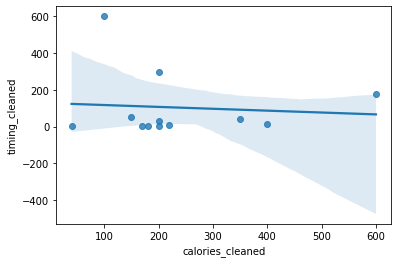

In [ ]:
import seaborn as sns

# sns.scatterplot(data=recipes_df,x="calories_cleaned", y ="timing_cleaned")
sns.regplot(data=recipes_df,x="calories_cleaned", y ="timing_cleaned")

In [ ]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             12 non-null     object
 1   calories          12 non-null     object
 2   timing            12 non-null     object
 3   calories_cleaned  12 non-null     int64 
 4   timing_cleaned    12 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 608.0+ bytes


In [ ]:
url="https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001"



In [ ]:
urls=[]
for i in range(25):
    urls.append("https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start="+str(i*10))
urls

['https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=0',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=10',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=20',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=30',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=40',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=50',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=60',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=70',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=80',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=90',
 'https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=100',
 'https://www.yelp.co

In [ ]:
request = urllib.request.Request(url,None,HEADERS)

file_req = urllib.request.urlopen(request)

file_data = file_req.read()

soup= BeautifulSoup(file_data)

In [ ]:
full_data=[]

for url in urls:
    print(url)
    request = urllib.request.Request(url,None,HEADERS)
    file_req = urllib.request.urlopen(request)
    file_data = file_req.read()

    soup= BeautifulSoup(file_data)
    
    for div in soup.find_all("div",{"class":" arrange-unit__09f24__rqHTg arrange-unit-fill__09f24__CUubG border-color--default__09f24__NPAKY"}):
        # print(div)

        a = div.find("a",{"class":"css-1m051bw"})
        if a is None: continue
        # print(a.text)

        rating=div.find("div",{"aria-label":True})
        rating_count=div.find("span",{"class": " css-chan6m"})

        payload=[a.text, rating["aria-label"],rating_count.text]
        full_data.append(payload)

full_data

https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=0
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=10
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=20
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=30
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=40
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=50
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=60
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=70
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=80
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=90
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2C+NY+10001&start=100
https://www.yelp.com/search?find_desc=italian&find_loc=New+York%2

[['Pepe Giallo', '4 star rating', '762'],
 ['Casa Soglia', '5 star rating', '6'],
 ['Tavola', '4 star rating', '1245'],
 ['Da Andrea', '4.5 star rating', '1836'],
 ['Ci Siamo', '4.5 star rating', '249'],
 ['Olio e Più', '4.5 star rating', '4044'],
 ['Mercato', '4 star rating', '1027'],
 ['Pepe Giallo', '4 star rating', '762'],
 ['Trattoria Trecolori', '4 star rating', '2608'],
 ['biricchino', '4 star rating', '166'],
 ['Sergimmo Salumeria', '4 star rating', '719'],
 ['Nittis', '4.5 star rating', '308'],
 ['Lunella Ristorante Italiano', '3.5 star rating', '318'],
 ['Pepe Giallo', '4 star rating', '762'],
 ['Casa Soglia', '5 star rating', '6'],
 ['Carmine’s Italian Restaurant - Times Square', '4 star rating', '4430'],
 ['Non Solo Piada', '4.5 star rating', '408'],
 ['Nino’s 46', '4 star rating', '1358'],
 ['Osteria La Baia', '4.5 star rating', '70'],
 ['Longo Bros', '4 star rating', '69'],
 ['L’Artusi', '4.5 star rating', '2247'],
 ['Tony’s Di Napoli', '4 star rating', '2496'],
 ['Ulivo'

In [ ]:
pd.DataFrame(full_data,columns=["title","rating","review_count"])

,title,rating,review_count
0,Pepe Giallo,4 star rating,762
1,Casa Soglia,5 star rating,6
2,Tavola,4 star rating,1245
3,Da Andrea,4.5 star rating,1836
4,Ci Siamo,4.5 star rating,249
...,...,...,...
306,Houndstooth Pub,3 star rating,434
307,Aria Hell’s Kitchen,3.5 star rating,481
308,Ribalta Pizza,4 star rating,745
309,Il Gattopardo,4 star rating,225
